# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("C:/Users/pasin/OneDrive/Desktop/ALHW/Matplotlib_Challenge/Pymaceuticals/data/Mouse_metadata.csv")
study_results = pd.read_csv("C:/Users/pasin/OneDrive/Desktop/ALHW/Matplotlib_Challenge/Pymaceuticals/data/Study_results.csv")

# Combine the data into a single DataFrame
mouse_study_mergeddata = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_mergeddata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [57]:
# Checking the number of mice.
mouse_count = mouse_study_mergeddata["Mouse ID"].count()
mouse_count 

1893

In [58]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = mouse_study_mergeddata[mouse_study_mergeddata.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = duplicate_rows['Mouse ID'].unique()
print(duplicate_mice)

['g989']


In [59]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_m = mouse_study_mergeddata.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)
duplicate_mice_ids = mouse_study_mergeddata.loc[duplicate_m, 'Mouse ID'].unique()
duplicate_mouse_data = mouse_study_mergeddata[mouse_study_mergeddata['Mouse ID'].isin(duplicate_mice_ids)]
print(duplicate_mouse_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [60]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mergeddata = mouse_study_mergeddata.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep = 'first')
print(clean_mergeddata)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [61]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = clean_mergeddata['Mouse ID'].nunique()
print("Number of mice in the clean DataFrame:", mouse_count2)

Number of mice in the clean DataFrame: 249


## Summary Statistics

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stats = clean_mergeddata.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
print(summary_stats)


                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [63]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

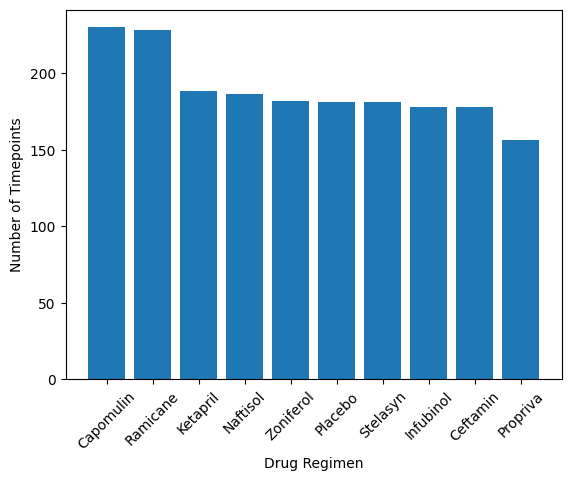

In [64]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_mergeddata['Drug Regimen'].value_counts()
plt.bar(regimen_counts.index, regimen_counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=45)
plt.show()



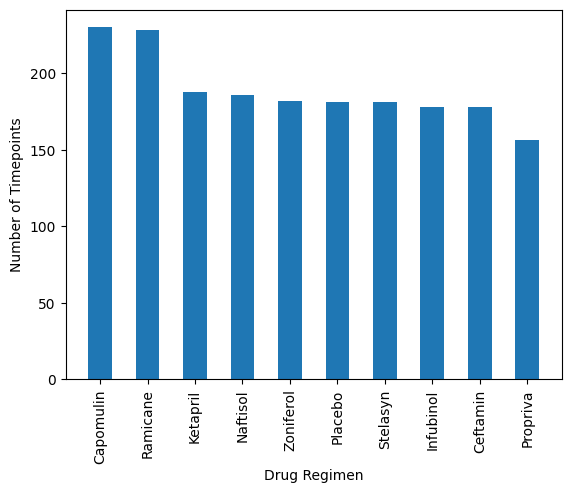

In [65]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_mergeddata['Drug Regimen'].value_counts()
plt.bar(regimen_counts.index, regimen_counts.values, width = .5)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=90)
plt.show()

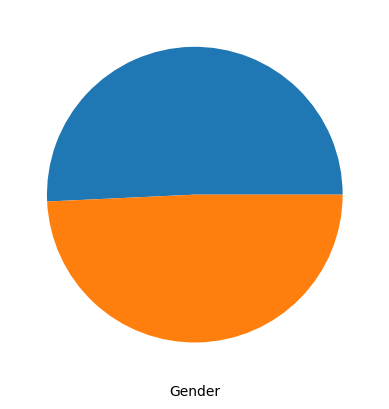

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_mergeddata['Sex'].value_counts()
plt.pie(gender_counts.values)
plt.xlabel('Gender')
plt.show()

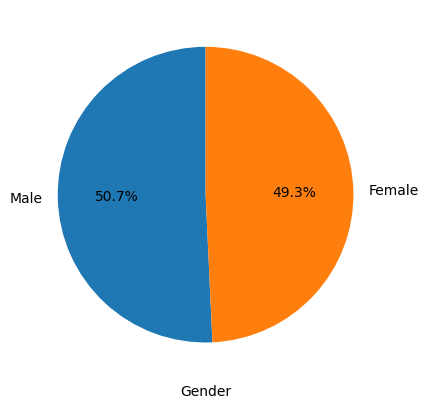

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = clean_mergeddata['Sex'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.xlabel('Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_mergeddata.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, clean_mergeddata, on=['Mouse ID', 'Timepoint'])

In [69]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_by_treatment = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol_by_treatment)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_by_treatment.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = tumor_vol_by_treatment[(tumor_vol_by_treatment < lower_bound) | (tumor_vol_by_treatment > upper_bound)]

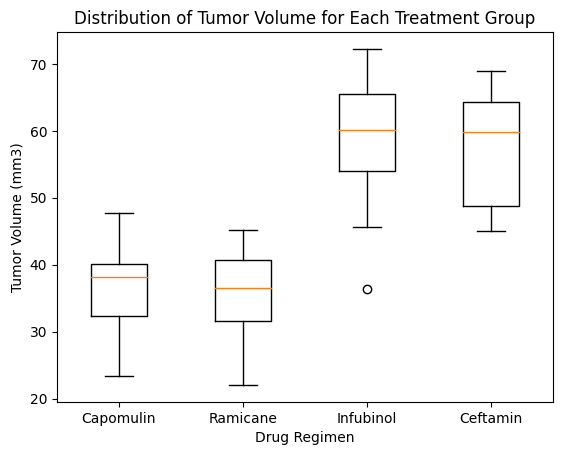

In [70]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatment_regimens)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.show()

## Line and Scatter Plots

In [74]:
#find all mice treated with capomulin
capomulin_mice = clean_mergeddata.loc[clean_mergeddata['Drug Regimen'] == 'Capomulin', 'Mouse ID'].unique()
print(capomulin_mice)

['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


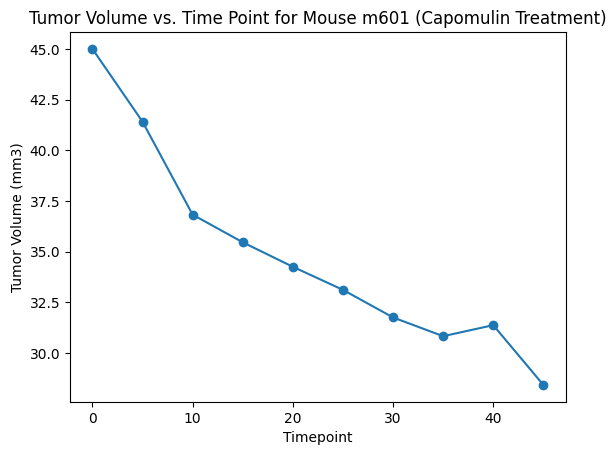

In [76]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'm601'
capomulin_data = clean_mergeddata[(clean_mergeddata['Drug Regimen'] == 'Capomulin') & (clean_mergeddata['Mouse ID'] == mouse_id)]
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.show()

In [81]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [73]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
